### Topic Modelling

As an example we'll be using the 20 newsgroups dataset consists of 18000+ newsgroup posts on 20 topics. You can learn more about the dataset at http://qwone.com/~jason/20Newsgroups/

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

### Load data



In [2]:
newsgroups_train = fetch_20newsgroups(subset='train')
print(list(newsgroups_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


To keep it simple, let's filter only 3 topics. Assume that we do not know the topics, let's run clustering algorithm and examine the keywords of each clusters

In [3]:
categories = ['alt.atheism', 'comp.graphics', 'rec.motorcycles']

dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=2017)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target

print("Extracting features from the dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataset.data)

print("n_samples: %d, n_features: %d" % X.shape)

2768 documents
3 categories
Extracting features from the dataset using a sparse vectorizer
n_samples: 2768, n_features: 35311


### Latent Dirichlet allocation

LDA’s objective is to maximize separation between means of projected topics and minimize variance within each projected topics. So LDA defines each topic as a bag of words by carrying out three steps described below. 
* Step 1: Initialize k clusters and assign each word in the each document to one of k topic. 
* Step 2: Re-assign word to new topic based on a) how is the proportion of words for a document to a topic b) how is the proportion of a topic wide spread across all documents.
* Step 3: Repeat step 2 until coherent topics are resulted

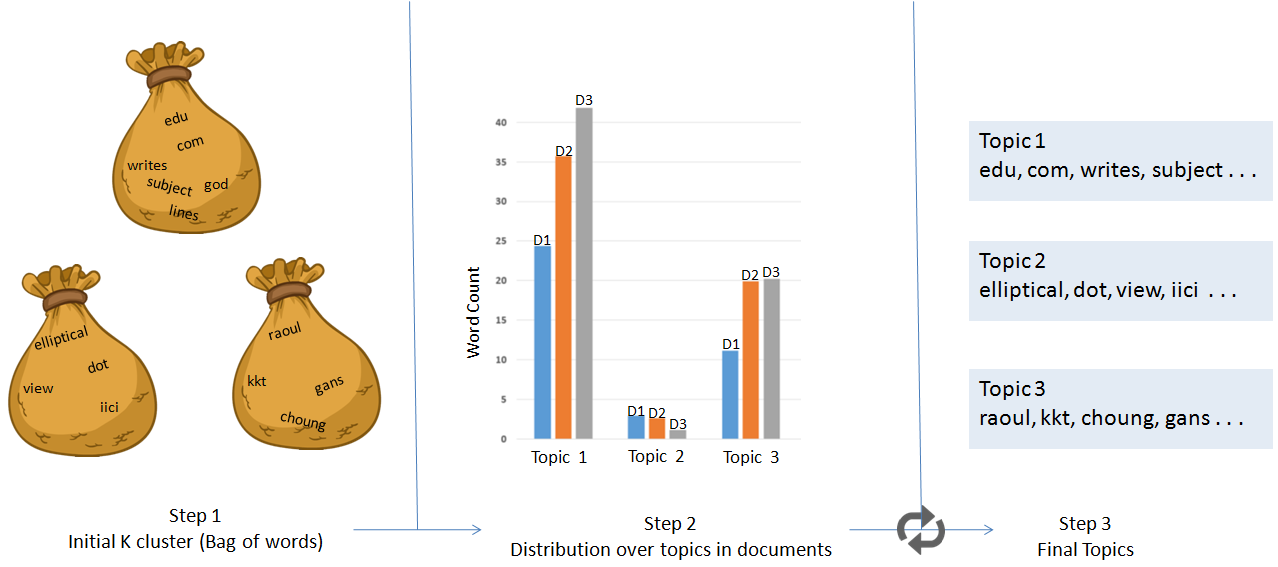

In [2]:
from IPython.display import Image
Image(filename='../Chapter 5 Figures/LDA.png', width=700)

In [4]:
from sklearn.decomposition import LatentDirichletAllocation

total_topics = 3
lda = LatentDirichletAllocation(n_topics=total_topics, 
                                max_iter=100,
                                learning_method='online', 
                                learning_offset=50.,
                                random_state=2017)
lda.fit(X)

feature_names = np.array(vectorizer.get_feature_names())

for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]))

Topic #0:
edu com writes subject lines organization article posting university nntp host don like god uk ca just bike know graphics
Topic #1:
anl elliptical maier michael_maier qmgate separations imagesetter 5298 unscene appreshed linotronic l300 iici amnesia glued veiw halftone 708 252 dot
Topic #2:
hl7204 eehp22 raoul vrrend386 qedbbs choung qed daruwala ims kkt briarcliff kiat philabs col op_rows op_cols keeve 9327 lakewood gans


### Negative Matrix Factorization

In [15]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=total_topics, random_state=2017, alpha=.1, l1_ratio=.5)
nmf.fit(X)

for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]))

Topic #0:
edu com god writes article don subject lines organization just university bike people posting like know uk ca think host
Topic #1:
sgi livesey keith solntze wpd jon caltech morality schneider cco moral com allan edu objective political cruel atheists gap writes
Topic #2:
sun east green ed egreen com cruncher microsystems ninjaite 8302 460 rtp 0111 nc 919 grateful drinking pixel biker showed
